In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr 

In [2]:
df = pdr.get_data_yahoo('AMZN',start = '2017-01-01')

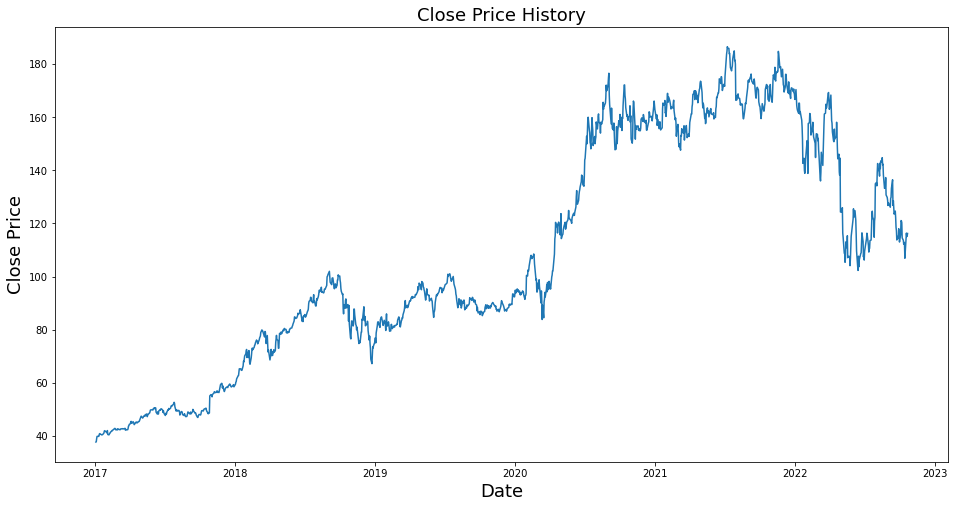

In [3]:
# Visually show the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
#Create a function to calculate the Simple Moving Average (SMA)
def SMA(data, period = 30, column='Close'):
    return data[column].rolling(window=period).mean()

In [5]:
# Create two new colums to store the 20 day and 50 day SMA
df['SMA20']=SMA(df,20)
df['SMA50']=SMA(df,50)

In [7]:
# Get the buy and sell signals
df['Signal'] = np.where(df['SMA20'] > df['SMA50'],1,0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'], np.NAN)

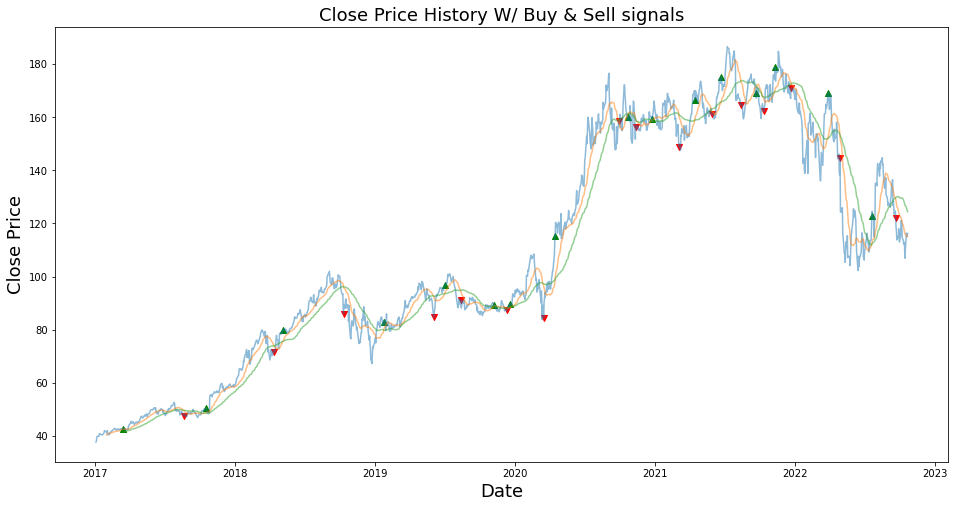

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close Price History W/ Buy & Sell signals', fontsize = 18)
plt.plot(df['Close'], alpha = 0.5, label='Close')
plt.plot(df['SMA20'], alpha = 0.5, label='SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label='SMA50')

plt.scatter(df.index, df['Buy'], alpha = 1, label='Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label='Sell Signal', marker = 'v', color = 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()